In [21]:
# import dependencies
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [22]:
# Create 8 dataframes, one for each .csv file
df1 = pd.read_csv('2018_01_01 to 2018_02_28.csv')
df2 = pd.read_csv('2018_03_01 to 2018_09_30.csv')
df3 = pd.read_csv('2018_10_01 to 2019_05_31.csv')
df4 = pd.read_csv('2019_06_01 to 2019_12_31.csv')
df5 = pd.read_csv('2020_01_01 to 2020_07_31.csv')
df6 = pd.read_csv('2020_08_01 to 2021_02_28.csv')
df7 = pd.read_csv('2021_03_01 to 2021_08_31.csv')
df8 = pd.read_csv('2021_09_01 to 2022_04_20.csv')

# Create a list of our 8 dataframes
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]

master_data = pd.concat(df_list, ignore_index=True)
# master_data.tail()
master_data.to_csv('CountyMasterFile.csv')

In [23]:
# Start here. Read in the master file and drop the first column, which is a kind of duplicate
# index column.
full_df = pd.read_csv('CountyMasterFile.csv', usecols=lambda x: x != 'Unnamed: 0')
len(full_df)

20335

In [24]:
# Now I need to clean the dataset from potential 'fat-finger' typos, which have the effect
# of massive discrepancies between the original list price and the sales.

# Create a column that calculates the 'delta' between the original list price ('OLP') and the
# Sold Price, with the latter being a percentage of the former.
full_df['delta'] = full_df['Sold Price']/full_df['OLP']*100

# show the smallest deltas to see where a natural cutoff would be to simply drop values. As shown
# by the below smallest 22 values, it appears I should drop the bottom 19 values, or all rows
# where 'delta' is less than 28%.
full_df['delta'].sort_values(ascending=True).head(22)

6626      0.091587
13645     0.097361
17655     0.100000
18273     0.101227
9193      0.110873
7877      1.018213
10861     8.548791
18899     9.090909
5919      9.548059
383       9.578947
875       9.979541
16833    10.000000
2636     10.003031
11941    10.092521
12641    10.128492
12767    10.137976
17382    10.246721
17883    10.367816
10017    10.433333
13811    28.643216
11160    31.446541
10940    38.491147
Name: delta, dtype: float64

In [25]:
# We'll start by dropping all rows with delta values below minus 500%. We'll create a new
# 'version' of the dataframe as we go along, naming it an intermediate1 dataframe, or int1_df,
# for short. At each cleaning step, we'll increment the int_df by one, just so we create a 
# new copy each time until we finally arrive at a final cleaned dataframe.
int1_df = full_df.loc[full_df['delta'] > 28, :]
len(int1_df)

20316

In [26]:
# By sorting in the opposite direction, I can see there's a big difference in delta values in the
# positive direction when I sort descending, i.e., largest first. Based on the 25 largest values,
# we'll drop all values with a delta value larger than 300%.
int1_df['delta'].sort_values(ascending=False).head(25)

18847    120000.000000
14632    100000.000000
7043      97674.418605
11805     94795.539033
1090      94032.258065
7861      12833.333333
19881     10507.120528
13897      1072.000000
15873      1003.861004
84          982.456140
7238        969.557289
7177        926.229508
8382        925.704210
12414       909.090909
3413        846.560847
19815       236.722307
16066       231.114177
15074       181.746032
6607        181.095890
479         170.000000
12791       169.090909
19413       167.583792
2924        166.666667
18276       162.337662
10323       160.740741
Name: delta, dtype: float64

In [27]:
# Finally, our new dataframe, 'clean_df', will only feature rows with a corresponding delta value
# less than 300%.
int2_df = int1_df.loc[int1_df['delta'] < 300, :]
len(int2_df)

20301

In [28]:
# Explore the dataset by using the describe() method. Immediately, I notice that the 'DOM' column
# has a couple problems, with a min value of -77. Since that column measures Days On Market, 
# this should only be a minimum of 0, with no negative values.
int2_df.describe()

,Sold Price,OLP,List Price,Price,DOM,Lot Size Acres,Ttl Fin Ar,Year Blt,Beds,Baths Full,Baths Half,delta
count,2.030100e+04,2.030100e+04,2.030100e+04,2.030100e+04,20301.000000,19005.000000,20301.000000,20297.000000,20301.000000,20301.000000,20301.000000,20301.000000
mean,3.551218e+05,3.612302e+05,3.574733e+05,3.551195e+05,33.595537,35.144834,2290.050244,2001.729763,3.746466,2.621546,0.564455,98.786454
std,1.864104e+05,2.101470e+05,2.032690e+05,1.864139e+05,54.149340,2018.428223,1638.954313,14.967177,0.983110,0.895345,0.556596,6.164692
min,3.000000e+03,2.500000e+03,2.500000e+03,3.000000e+03,-77.000000,0.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,28.643216
25%,2.500000e+05,2.519000e+05,2.500000e+05,2.500000e+05,4.000000,0.144000,1501.000000,1994.000000,3.000000,2.000000,0.000000,96.463023
50%,3.180000e+05,3.216100e+05,3.199000e+05,3.180000e+05,11.000000,0.331000,2147.000000,2004.000000,4.000000,2.000000,1.000000,99.587544
75%,4.120000e+05,4.194440e+05,4.149000e+05,4.120000e+05,41.000000,0.625000,2964.000000,2014.000000,4.000000,3.000000,1.000000,101.149425
max,9.250000e+06,1.350000e+07,1.350000e+07,9.250000e+06,1044.000000,250125.000000,59246.000000,2022.000000,9.000000,14.000000,10.000000,236.722307


In [29]:
# Instead of dropping any values with negative DOM values, I'll create a new column called 
# 'DOM_actual' where I'll subtract 'OMD' (off market date) from 'OnMtDate' to get the real number
# of days inbetween the date when it was taken off the market from when it was first listed.

# But first, cast these 2 columns as datetime64 variables so we can perform the operation.
int3_df = int2_df.copy()
int3_df["OnMktDate"] =  int2_df["OnMktDate"].astype('datetime64[ns]')
int3_df["OMD"] =  int2_df["OMD"].astype('datetime64[ns]')

int3_df['DOM_actual'] = (int3_df["OMD"] - int3_df["OnMktDate"]).dt.days
int3_df.describe()

,Sold Price,OLP,List Price,Price,DOM,Lot Size Acres,Ttl Fin Ar,Year Blt,Beds,Baths Full,Baths Half,delta,DOM_actual
count,2.030100e+04,2.030100e+04,2.030100e+04,2.030100e+04,20301.000000,19005.000000,20301.000000,20297.000000,20301.000000,20301.000000,20301.000000,20301.000000,20301.000000
mean,3.551218e+05,3.612302e+05,3.574733e+05,3.551195e+05,33.595537,35.144834,2290.050244,2001.729763,3.746466,2.621546,0.564455,98.786454,35.915374
std,1.864104e+05,2.101470e+05,2.032690e+05,1.864139e+05,54.149340,2018.428223,1638.954313,14.967177,0.983110,0.895345,0.556596,6.164692,56.324708
min,3.000000e+03,2.500000e+03,2.500000e+03,3.000000e+03,-77.000000,0.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,28.643216,-77.000000
25%,2.500000e+05,2.519000e+05,2.500000e+05,2.500000e+05,4.000000,0.144000,1501.000000,1994.000000,3.000000,2.000000,0.000000,96.463023,4.000000
50%,3.180000e+05,3.216100e+05,3.199000e+05,3.180000e+05,11.000000,0.331000,2147.000000,2004.000000,4.000000,2.000000,1.000000,99.587544,13.000000
75%,4.120000e+05,4.194440e+05,4.149000e+05,4.120000e+05,41.000000,0.625000,2964.000000,2014.000000,4.000000,3.000000,1.000000,101.149425,45.000000
max,9.250000e+06,1.350000e+07,1.350000e+07,9.250000e+06,1044.000000,250125.000000,59246.000000,2022.000000,9.000000,14.000000,10.000000,236.722307,1044.000000


In [30]:
# There are still negative values for our 'DOM_actual' column, so we'll just drop these rows
# completely from the dataset by creating a new, slimmer dataframe ('int4_df')
int4_df = int3_df.copy()
int4_df = int4_df.loc[int4_df['DOM_actual'] >= 0]
len(int4_df)

20291

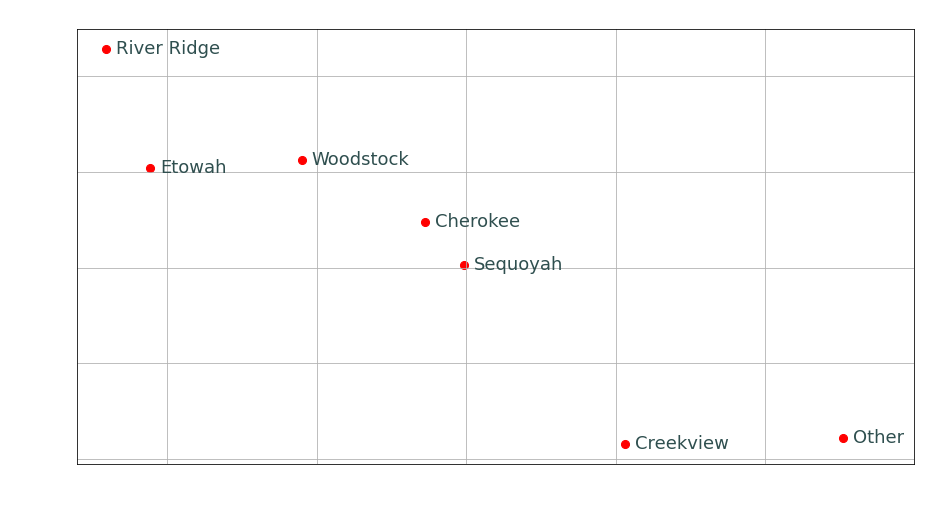

In [31]:
# Next I create a fresh, clean dataset from the last iteration of my dataset, 'int4_df' 
clean_df = int4_df.copy()

# Now, let's explore the time each home spent on the market vs. the delta between the list and
# the sales. We would expect that, as DOM gets smaller (i.e., the less amount of time it spent
# on the market), the delta would approach (or even exceed) 100. Another way of saying this is,
# buyers usually get what they ask for (or even more) the less time their home spends on the market.
mean_DOM = clean_df.groupby('High Schl')['DOM_actual'].mean()
mean_delta = clean_df.groupby('High Schl')['delta'].mean()

# Now I'll create the dataframe that stores the above lists and create a scatter
hs_df = pd.DataFrame(
    {"Avg. DOM":mean_DOM,
    "Avg. Delta":mean_delta
    }
)

# As shown from the below scatter, a clear & strong correlation appears to exist between
# how long a home stays on the market and the percentage of list price for which it sells
ax1 = hs_df.plot.scatter(x='Avg. DOM', y='Avg. Delta',c='red',grid=True,figsize=(15,8),s=65)
ax1.set_xlabel('Avg. Days on Market', fontdict = {'fontsize':20,'color':'white'})
ax1.set_ylabel('Sales Price as % of List Price', fontdict = {'fontsize':20,'color':'white'})
ax1.tick_params(axis='x',colors='white',labelsize=18)
ax1.tick_params(axis='y',colors='white',labelsize=18)
ax1.set_title('Days on Market vs. Sales/List % for Area High Schools',
             fontdict = {'fontsize':22,'color':'white'})
ax1.set_xlim(27,55)

for k, v in hs_df.iterrows():
    ax1.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')

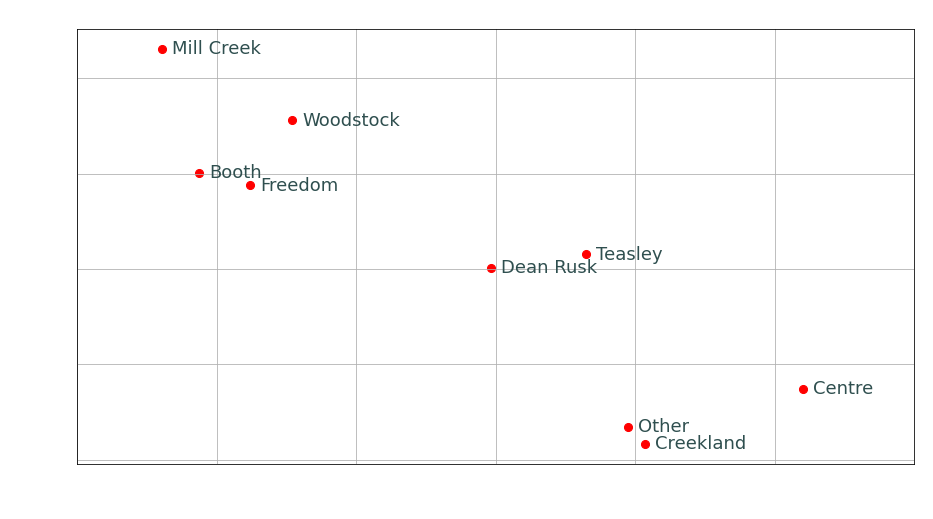

In [32]:
# How 'bout middle schools?
mean_DOM = clean_df.groupby('Middle Schl')['DOM_actual'].mean()
mean_delta = clean_df.groupby('Middle Schl')['delta'].mean()

ms_df = pd.DataFrame(
    {"Avg. DOM":mean_DOM,
    "Avg. Delta":mean_delta
    }
)

ax2 = ms_df.plot.scatter(x='Avg. DOM', y='Avg. Delta',c='red',grid=True,figsize=(15,8),s=65)
ax2.set_xlabel('Avg. Days on Market', fontdict = {'fontsize':20,'color':'white'})
ax2.set_ylabel('Sales Price as % of List Price', fontdict = {'fontsize':20,'color':'white'})
ax2.tick_params(axis='x',colors='white',labelsize=18)
ax2.tick_params(axis='y',colors='white',labelsize=18)
ax2.set_title('Days on Market vs. Sales/List % for Area Middle Schools',
             fontdict = {'fontsize':22,'color':'white'})
ax2.set_xlim(25,55)

for k, v in ms_df.iterrows():
    ax2.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=18, color='darkslategrey')
    
# clean_df['Middle Schl'].unique()

In [33]:
clean_df['Elem Schl'].unique()

array(['Little River Primary/Elementar', 'Avery', 'Mountain Road',
       'Hickory Flat', 'Arnold Mill', 'Liberty', 'Ball Ground', 'Sixes',
       'Other', 'Bascomb', 'R M Moore', 'Knox', 'Canton', 'Clayton',
       'Holly Springs', 'Boston', 'Woodstock', 'Macedonia', 'Carmel',
       'Hasty', 'Oak Grove', 'Free Home', 'Indian Knoll', 'Johnston',
       'Clark Creek', 'Centre'], dtype=object)

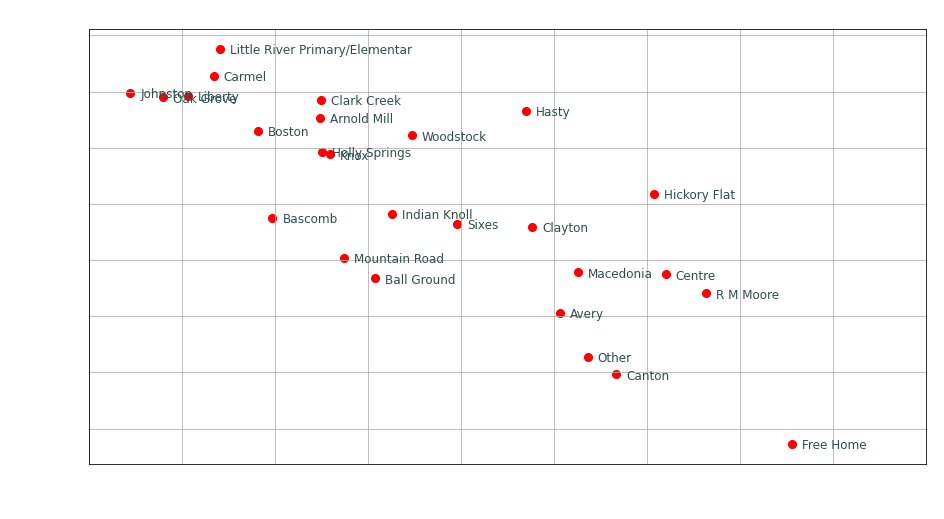

In [34]:
# How 'bout elementary schools?
mean_DOM = clean_df.groupby('Elem Schl')['DOM_actual'].mean()
mean_delta = clean_df.groupby('Elem Schl')['delta'].mean()

es_df = pd.DataFrame(
    {"Avg. DOM":mean_DOM,
    "Avg. Delta":mean_delta
    }
)

ax3 = es_df.plot.scatter(x='Avg. DOM', y='Avg. Delta', c='red', grid=True, figsize=(15,8), s=65)
ax3.set_xlabel('Avg. Days on Market', fontdict = {'fontsize':20,'color':'white'})
ax3.set_ylabel('Sales Price as % of List Price', fontdict = {'fontsize':20,'color':'white'})
ax3.tick_params(axis='x',colors='white',labelsize=18)
ax3.tick_params(axis='y',colors='white',labelsize=18)
ax3.set_title('Days on Market vs. Sales/List % for Area Elementary Schools',
             fontdict = {'fontsize':22,'color':'white'})
ax3.set_xlim(20,65)

for k, v in es_df.iterrows():
    ax3.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=12, color='darkslategrey')

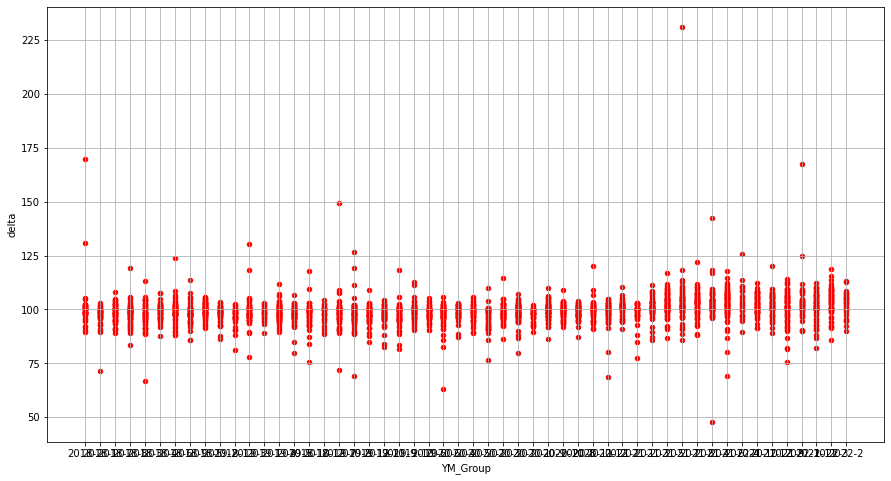

In [59]:
# # This next block of code will create a new data frame and scatter plot for each high school,
# # with the scatter showing the 'delta' value over time. Looks to be ever-so-slightly increasing
# # but still hovering at or near the 100 mark
# h_dfs = {}
# for each in clean_df['High Schl'].unique():
#     # create the dataframe
#     h_dfs[each] = pd.DataFrame(clean_df.loc[clean_df['High Schl'] == each],
#                             columns=['Clsd Date','OLP','Sold Price','delta','DOM_actual'])
    
#     # create the scatter from each dataframe
#     h_dfs[each].plot.scatter(x='Clsd Date', y='delta',c='Red',grid=True)
#     plt.show()
#     print(f"Created dataframe & scatter (see above) for {each} High School")
#     print("----------------------------------------------------------------")

rr_df = h_dfs['River Ridge']
rr_df['yyyy'] = pd.to_datetime(rr_df['Clsd Date']).dt.year
rr_df['mm'] = pd.to_datetime(rr_df['Clsd Date']).dt.month

rr_df['YM_Group'] = rr_df['yyyy'].astype(str) + '-'+ rr_df['mm'].astype(str)

rr_df

ax1 = rr_df.plot.scatter(x='YM_Group', y='delta', color='red',
                                        figsize=(15,8), grid=True)
plt.show()

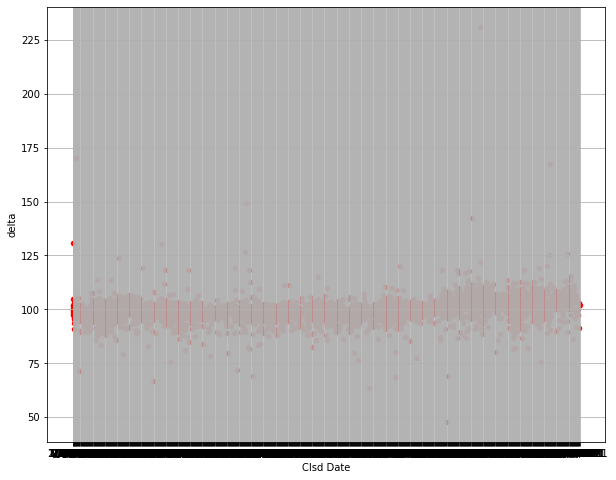

Created dataframe & scatter (see above) for Mill Creek Middle School
----------------------------------------------------------------


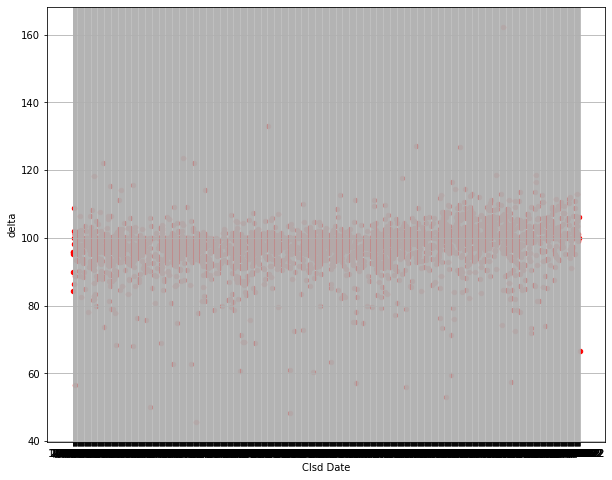

Created dataframe & scatter (see above) for Creekland Middle School
----------------------------------------------------------------


KeyboardInterrupt: 

In [20]:
# Now we can create dataframes and scatters for all middle schools in the data set
m_dfs = {}
for each in clean_df['Middle Schl'].unique():
    # create the dataframe
    m_dfs[each] = pd.DataFrame(clean_df.loc[clean_df['Middle Schl'] == each],
                            columns=['Clsd Date','OLP','Sold Price','delta','DOM_actual'])
    
    # create the scatter from each dataframe
    m_dfs[each].plot.scatter(x='Clsd Date', y='delta',c='Red',grid=True,figsize=(10,8))
    plt.show()
    print(f"Created dataframe & scatter (see above) for {each} Middle School")
    print("----------------------------------------------------------------")